In [2]:
#import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

In [4]:
df_motion = pd.read_csv('clustering_columns.csv')

In [6]:
df_motion.head()

,shiftSinceLineset,motionSinceLineset,snap_motion_gap,init_rel_y_dis,end_rel_y_dis,overall_y_change,init_rel_x_dis,end_rel_x_dis,overall_x_change,motion_s_avg,frames_in_motion,y_reverse_loc,y_reverse_bool
0,0,1,24,173,-1396,1569,-182,-107,-75,339.404255,47,-1397.0,0
1,0,1,0,983,201,782,-244,-649,405,341.953488,43,984.0,1
2,0,1,0,2,-320,322,-475,-256,-219,234.147059,34,-532.0,1
3,0,1,40,554,613,-59,-221,-146,-75,120.888889,9,614.0,0
4,0,1,0,556,-344,900,-195,-275,80,412.727273,22,-344.0,0


In [8]:
# #get dummy variables for non-numeric columns

# df_motion = pd.get_dummies(df_motion, columns=['position'], drop_first=False, dtype='int')

In [10]:
from sklearn.preprocessing import StandardScaler

#standardize the variables before conducting PCA
scaler = StandardScaler()
scaler.fit(df_motion)
df_motion_scaled = scaler.transform(df_motion)

In [12]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=5, random_state=42)

In [13]:
pca.fit(df_motion_scaled)

PCA(n_components=5, random_state=42)

In [16]:
x_pca = pca.transform(df_motion_scaled)

In [18]:
df_motion_scaled.shape

(5714, 13)

In [20]:
x_pca.shape

(5714, 5)

In [22]:
# Perform PCA (already done in your code)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)
print("Total Variance Explained:", np.sum(explained_variance))

Explained Variance Ratio: [0.2215603  0.21221619 0.14070803 0.10512645 0.09307936]
Total Variance Explained: 0.7726903346026972


C:\Users\etien\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\etien\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\etien\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\etien\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\etien\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

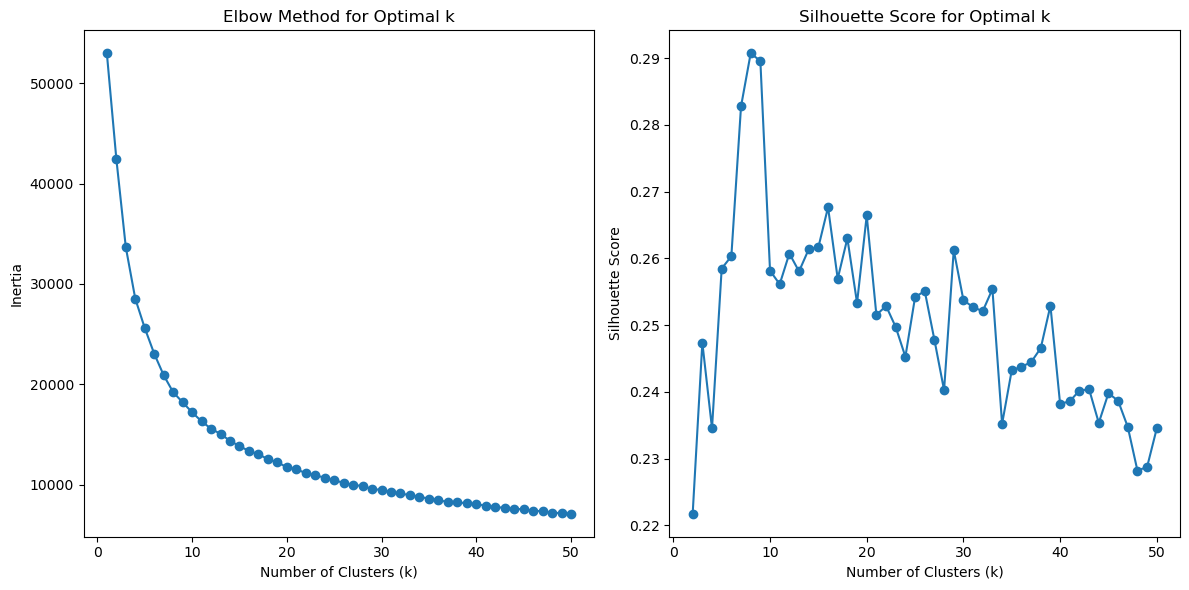

In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define a range of k values to try
k_range = range(1, 51)  # Trying k values from 1 to 50

# For storing inertia and silhouette scores
inertia = []
sil_scores = []

# Loop through each value of k
for k in k_range:
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(x_pca)  # Use your PCA-transformed data (x_pca)

    # Compute inertia for Elbow Method
    inertia.append(kmeans.inertia_)

    # Compute silhouette score
    if k > 1:  # Silhouette score is only defined for k > 1
        sil_score = silhouette_score(x_pca, labels)
        sil_scores.append(sil_score)
    else:
        sil_scores.append(-1)  # For k=1, silhouette score is undefined


# Plot the Elbow Method (Inertia vs. k)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Plot the Silhouette Scores (Silhouette Score vs. k)
plt.subplot(1, 2, 2)
plt.plot(k_range[1:], sil_scores[1:], marker='o')  # Skip the first value (k=1)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')

plt.tight_layout()
plt.show()


In [26]:
#use n=15 based on this
kmeans = KMeans(n_clusters=20, random_state=42)  # Adjust clusters as needed
labels = kmeans.fit_predict(x_pca)

C:\Users\etien\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=23.
  warnings.warn(


In [28]:
kmeans.labels_

array([ 5,  8, 11, ...,  6, 15,  1])

In [30]:
#set labels as a column in original df

In [32]:
df_player_play_motion = pd.read_csv('df_player_play_motion.csv')

In [34]:
df_player_play_motion['motion_label'] = kmeans.labels_

In [36]:
df_player_play_motion.head()

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,overall_y_change,init_rel_x_dis,end_rel_x_dis,overall_x_change,motion_s_avg,frames_in_motion,y_reverse_loc,y_reverse_bool,y_flipped,motion_label
0,2022090800,56,42489,BUF,0,0,0,0,0,1,...,1569,-182,-107,-75,339.404255,47,-1397.0,0,0,5
1,2022090800,80,47857,BUF,0,0,0,0,0,0,...,782,-244,-649,405,341.953488,43,984.0,1,1,8
2,2022090800,101,53079,BUF,0,0,0,0,0,0,...,322,-475,-256,-219,234.147059,34,-532.0,1,1,11
3,2022090800,191,53079,BUF,0,0,0,0,0,0,...,-59,-221,-146,-75,120.888889,9,614.0,0,1,4
4,2022090800,212,47879,BUF,0,0,0,0,0,0,...,900,-195,-275,80,412.727273,22,-344.0,0,0,5


In [38]:
# Create a dictionary to hold DataFrames for each unique motion_label
motion_label_dfs = {label: df_player_play_motion[df_player_play_motion['motion_label'] == label]
                     for label in df_player_play_motion['motion_label'].unique()}

In [40]:
# Get the row size of every DataFrame in motion_label_dfs
row_sizes = {label: df.shape[0] for label, df in motion_label_dfs.items()}
# Print the row sizes in numerical order, one per line
for label, size in sorted(row_sizes.items(), key=lambda item: item[1]):
    print(f'Motion Label: {label}, Row Size: {size}')

##CHECK THE MOTIONS WITH ONLY 2 IN THE GROUP, LIKELY OUTLIERS THAT CAN BE CUT

Motion Label: 19, Row Size: 6
Motion Label: 18, Row Size: 98
Motion Label: 13, Row Size: 145
Motion Label: 3, Row Size: 157
Motion Label: 11, Row Size: 163
Motion Label: 0, Row Size: 174
Motion Label: 6, Row Size: 175
Motion Label: 8, Row Size: 181
Motion Label: 14, Row Size: 187
Motion Label: 7, Row Size: 281
Motion Label: 12, Row Size: 286
Motion Label: 9, Row Size: 289
Motion Label: 4, Row Size: 331
Motion Label: 2, Row Size: 340
Motion Label: 17, Row Size: 363
Motion Label: 10, Row Size: 465
Motion Label: 1, Row Size: 505
Motion Label: 5, Row Size: 516
Motion Label: 16, Row Size: 522
Motion Label: 15, Row Size: 530


In [42]:
#example

motion_category = 10

motion_label_dfs[motion_category][:20]

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,overall_y_change,init_rel_x_dis,end_rel_x_dis,overall_x_change,motion_s_avg,frames_in_motion,y_reverse_loc,y_reverse_bool,y_flipped,motion_label
16,2022090800,569,42489,BUF,0,0,0,0,0,1,...,1394,-184,-231,47,358.000000,39,835.0,1,0,10
51,2022090800,2184,42489,BUF,0,0,0,0,0,1,...,2104,-212,-95,-117,314.029851,67,530.0,1,1,10
92,2022091100,301,45244,NO,0,0,0,0,0,0,...,1673,-204,-228,24,293.362069,58,1180.0,1,0,10
96,2022091100,458,53612,ATL,0,0,0,0,0,0,...,1441,-215,-188,-27,354.219512,41,945.0,1,1,10
104,2022091100,828,43336,NO,0,0,0,0,0,0,...,3232,-107,-104,-3,424.013158,76,1697.0,1,1,10
112,2022091100,1017,48374,ATL,0,0,0,0,0,0,...,1207,-189,-209,20,461.384615,26,912.0,1,0,10
124,2022091100,1281,52489,ATL,0,0,0,0,0,0,...,2260,-238,-201,-37,408.563636,55,1188.0,1,0,10
135,2022091100,2069,54476,NO,0,0,0,0,0,0,...,1504,-164,-336,172,549.642857,28,966.0,1,1,10
140,2022091100,2183,45244,NO,0,0,0,0,0,0,...,1426,-271,-246,-25,449.187500,32,927.0,1,1,10
164,2022091100,3289,41808,ATL,0,0,0,0,0,0,...,1327,-168,-221,53,333.000000,40,948.0,1,0,10


Observations on the results
- Doesn't seem to care if a player runs back and forth, for example: [2022091100, 166]
- Might be useful to add distance from QB to this (distinguish between starting in backfield, lined up outside etc.) Tried to do with line but maybe didn't work great

In [44]:
df_player_play_motion[(df_player_play_motion['gameId'] == 2022091100) & (df_player_play_motion['playId'] == 166)]

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,overall_y_change,init_rel_x_dis,end_rel_x_dis,overall_x_change,motion_s_avg,frames_in_motion,y_reverse_loc,y_reverse_bool,y_flipped,motion_label
85,2022091100,166,48374,ATL,0,0,0,0,0,0,...,874,-154,-245,91,375.483871,62,940.0,1,1,16


In [46]:
#Export labels for every motion
df_player_play_motion.to_csv('player_play_motion_labels.csv',index=False)

#Create a short description for all categories for the reader